In [97]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set base path relative to your notebook's location
data_folder = os.path.join("Data")

# Optional: for larger displays
pd.set_option('display.max_columns', None)


In [99]:
# Define file paths
rangeland_file = os.path.join(data_folder, "KE_KAP_rangeland_biomet.xlsx")
cropland_file = os.path.join(data_folder, "KE_AUS_cropland_biomet.csv")
gapfilled_kap_file = os.path.join(data_folder, "KE_KAP_gapfilledNEE_LE.txt")
gapfilled_aus_file = os.path.join(data_folder, "KE_AUS_gapfilledNEE_LE.txt")



In [100]:
# Read Excel file
rangeland_data = pd.read_excel(rangeland_file)

# Read CSV file
cropland_data = pd.read_csv(cropland_file)

# Read TXT (tab-separated)
gapfill_kap = pd.read_csv(gapfilled_kap_file, sep="\t")
gapfill_aus = pd.read_csv(gapfilled_aus_file, sep="\t")


C:\Users\VOdongo\AppData\Local\Temp\ipykernel_16552\4008696132.py:5: DtypeWarning: Columns (1,5,8,11,12,13,14,16,19,29,30,31,40,46,63,64,66,67,68,70,71,73,74,75,76,77,78,79,80,81,82,83,88) have mixed types. Specify dtype option on import or set low_memory=False.
  cropland_data = pd.read_csv(cropland_file)
C:\Users\VOdongo\AppData\Local\Temp\ipykernel_16552\4008696132.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  gapfill_kap = pd.read_csv(gapfilled_kap_file, sep="\t")
C:\Users\VOdongo\AppData\Local\Temp\ipykernel_16552\4008696132.py:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,

In [101]:
# === CLEAN GAPFILL_KAP ===
gapfill_kap['NEE'] = pd.to_numeric(gapfill_kap['NEE'], errors='coerce')
gapfill_kap_clean = gapfill_kap.dropna(subset=['NEE'])
gapfill_kap_clean = gapfill_kap_clean[~gapfill_kap_clean['NEE'].isin([-9999, -999])].copy()

# === CLEAN GAPFILL_AUS ===
gapfill_aus['NEE'] = pd.to_numeric(gapfill_aus['NEE'], errors='coerce')
gapfill_aus_clean = gapfill_aus.dropna(subset=['NEE'])
gapfill_aus_clean = gapfill_aus_clean[~gapfill_aus_clean['NEE'].isin([-9999, -999])].copy()

print("Number of NaNs in NEE:", gapfill_kap['NEE'].isna().sum())
print("\nData types inside NEE column:")
print(gapfill_kap['NEE'].apply(type).value_counts())

print("Number of NaNs in NEE:", gapfill_aus['NEE'].isna().sum())
print("\nData types inside NEE column:")
print(gapfill_aus['NEE'].apply(type).value_counts())

Number of NaNs in NEE: 1

Data types inside NEE column:
NEE
<class 'float'>    8917
Name: count, dtype: int64
Number of NaNs in NEE: 1

Data types inside NEE column:
NEE
<class 'float'>    8917
Name: count, dtype: int64


In [83]:
print("Rangeland Variables:", rangeland_data.columns.tolist())
print("Cropland Variables:", cropland_data.columns.tolist())
print("Gapfilled KAP Variables:", gapfill_kap.columns.tolist())
print("Gapfilled AUS Variables:", gapfill_aus.columns.tolist())


Rangeland Variables: ['DateTime', 'DOY_meteodata', 'Ta_1_1_1', 'TA_1_2_1', 'Rn_1_1_1', 'SHF_1_1_1', 'SHF_2_1_1', 'SHF_3_1_1', 'RH_1_1_1', 'SWin_1_1_1', 'SWC_1_1_1', 'SWC_2_1_1', 'SWC_3_1_1', 'Ts_1_1_1', 'Ts_2_1_1', 'Ts_3_1_1', 'PPFD_1_1_1', 'P_rain_1_1_1', 'DOY_meteofull', 'VPD', 'H', 'LE', 'co2_flux', 'qc_co2_flux']
Cropland Variables: ['TIMESTAMP', 'RECORD', 'FC', 'FC_mass', 'FC_QC', 'FC_samples', 'LE', 'LE_QC', 'LE_samples', 'H', 'H_QC', 'H_samples', 'NETRAD', 'G', 'SG', 'energy_closure', 'poor_energy_closure_flg', 'Bowen_ratio', 'TAU', 'TAU_QC', 'USTAR', 'TSTAR', 'TKE', 'Tair', 'TA_SIGMA_1_1_1', 'RH', 'T_DP_1_1_1', 'e', 'e_sat', 'TA_2_1_1', 'RH_2_1_1', 'T_DP_2_1_1', 'e_probe', 'e_sat_probe', 'H2O_probe', 'PA', 'PA_SIGMA', 'VPD', 'U', 'U_SIGMA', 'V', 'V_SIGMA', 'W', 'W_SIGMA', 'T_SONIC', 'T_SONIC_SIGMA', 'sonic_azimuth', 'WS', 'WS_RSLT', 'WD_SONIC', 'WD_SIGMA', 'WD', 'WS_MAX', 'CO2', 'CO2_SIGMA', 'CO2_density', 'CO2_density_SIGMA', 'H2O', 'H2O_SIGMA', 'H2O_density', 'H2O_density_SIG

In [ ]:
# Print some examples of DateTime values from each dataset

print("\n🔵 Rangeland DateTime Sample:")
print(rangeland_data['DateTime'].head(10))

print("\n🟢 Cropland TIMESTAMP Sample:")
print(cropland_data['TIMESTAMP'].head(10))

print("\n🟡 Gapfill KAP Date Time Sample:")
print(gapfill_kap['Date Time'].head(10))

print("\n🟠 Gapfill AUS Date Time Sample:")
print(gapfill_aus['Date Time'].head(10))


In [102]:
# For cropland
cropland_data['TIMESTAMP'] = pd.to_datetime(cropland_data['TIMESTAMP'], format='%m/%d/%Y %H:%M')
# Drop first row where Date Time == 'POSIXDate Time'
gapfill_kap = gapfill_kap[gapfill_kap['Date Time'] != 'POSIXDate Time'].copy()
gapfill_aus = gapfill_aus[gapfill_aus['Date Time'] != 'POSIXDate Time'].copy()

# Now parse Date Time properly
gapfill_kap['Date Time'] = pd.to_datetime(gapfill_kap['Date Time'], format='%m/%d/%Y %H:%M')
gapfill_aus['Date Time'] = pd.to_datetime(gapfill_aus['Date Time'], format='%m/%d/%Y %H:%M')


In [ ]:
print("\n🔵 Rangeland DateTime Sample (After Fix):")
print(rangeland_data['DateTime'].head(10))

print("\n🟢 Cropland TIMESTAMP Sample (After Fix):")
print(cropland_data['TIMESTAMP'].head(10))

print("\n🟡 Gapfill KAP Date Time Sample (After Fix):")
print(gapfill_kap['Date Time'].head(10))

print("\n🟠 Gapfill AUS Date Time Sample (After Fix):")
print(gapfill_aus['Date Time'].head(10))


In [ ]:
# Make sure 'DateTime' is your x-axis
plt.figure(figsize=(12, 6))
plt.plot(rangeland_data['DateTime'], rangeland_data['TA_1_2_1'] - 273.15, marker='o', linestyle='-', markersize=2)

plt.xlabel('Date')
plt.ylabel('Air Temperature (°C)')
plt.title('Rangeland Air Temperature over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [103]:
def plot_variable(df, time_col, variable, title=None, remove_values=[-9999, -999]):
    # Convert to numeric just in case
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    
    # Drop NaNs
    clean_df = df.dropna(subset=[variable])

    # Remove known bad values (e.g., -9999)
    if remove_values:
        clean_df = clean_df[~clean_df[variable].isin(remove_values)].copy()
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(clean_df[time_col], clean_df[variable], marker='.', linestyle='-', markersize=2)
    plt.xlabel('Date')
    plt.ylabel(variable)
    plt.title(title if title else f'{variable} over Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


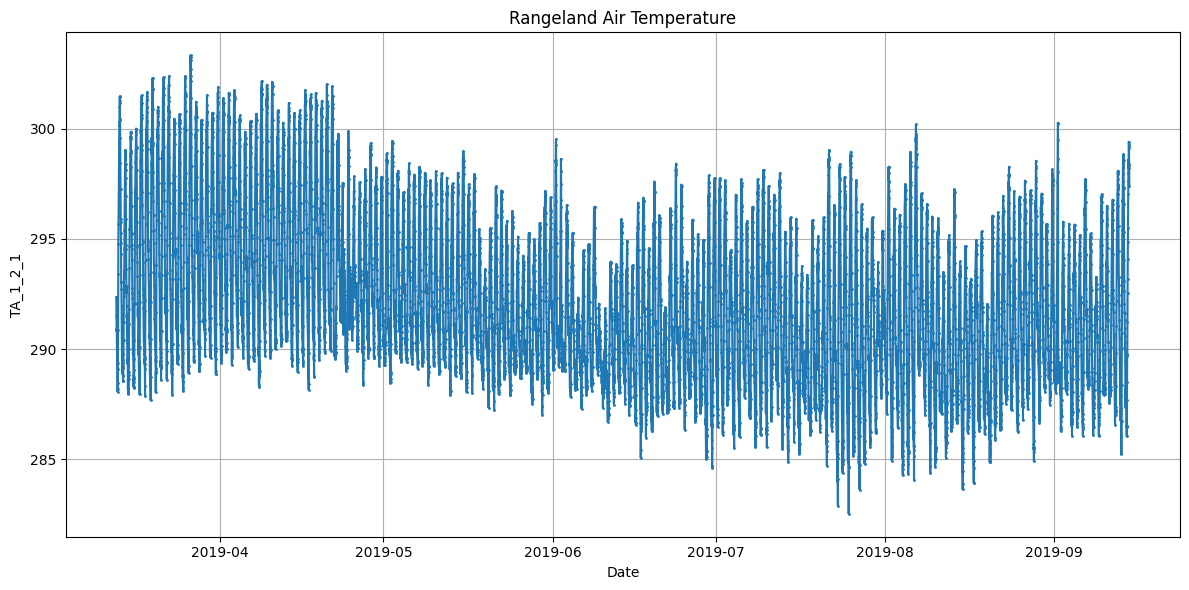

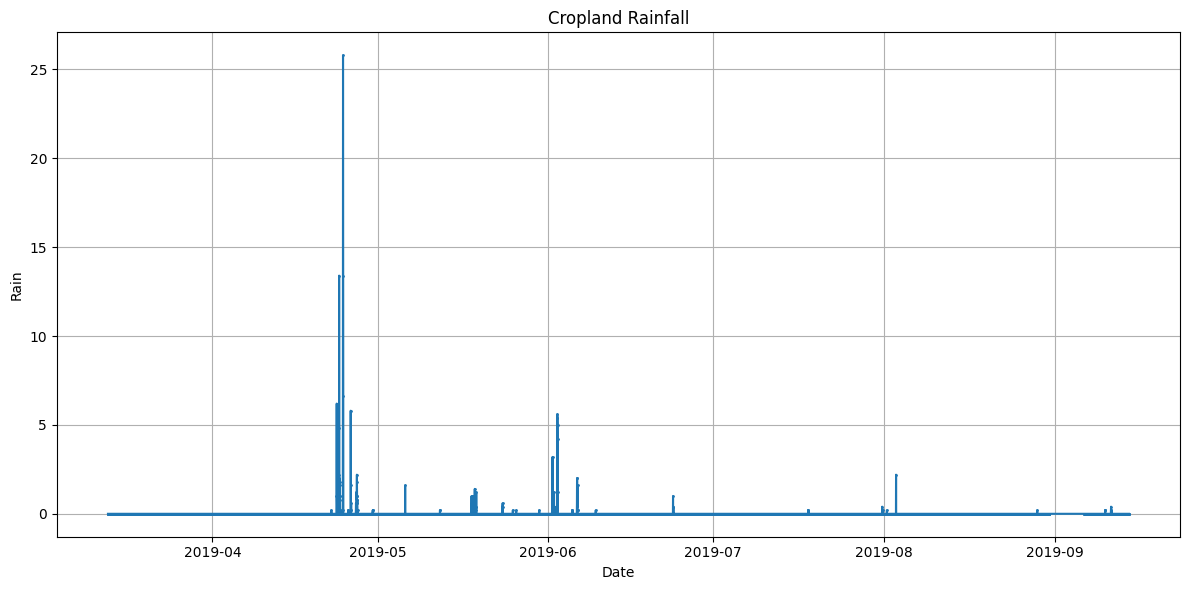

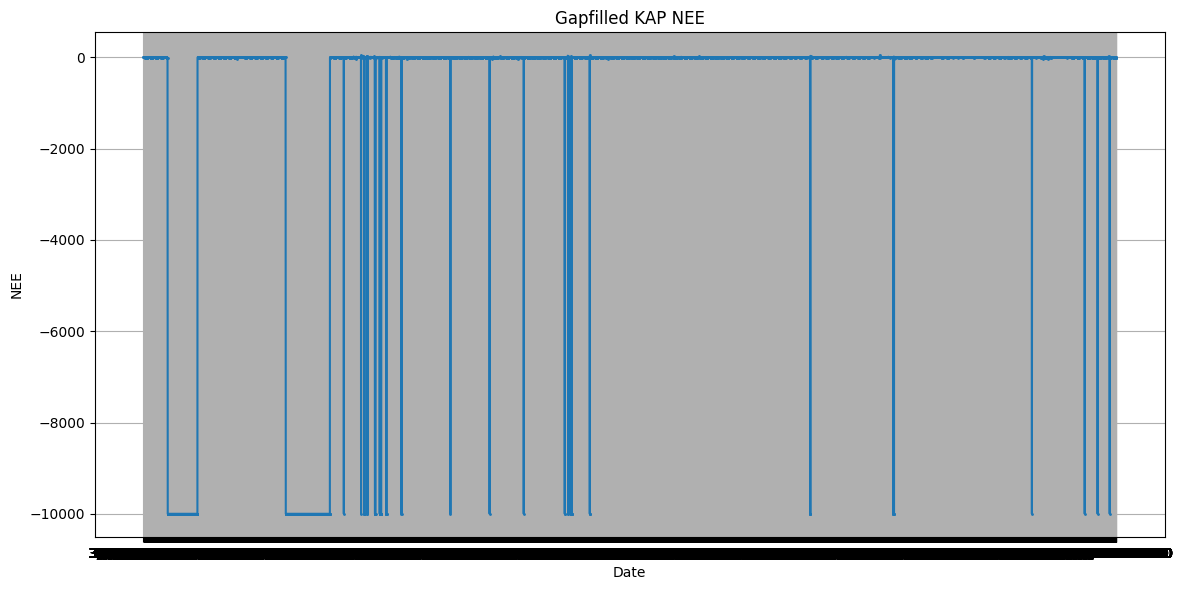

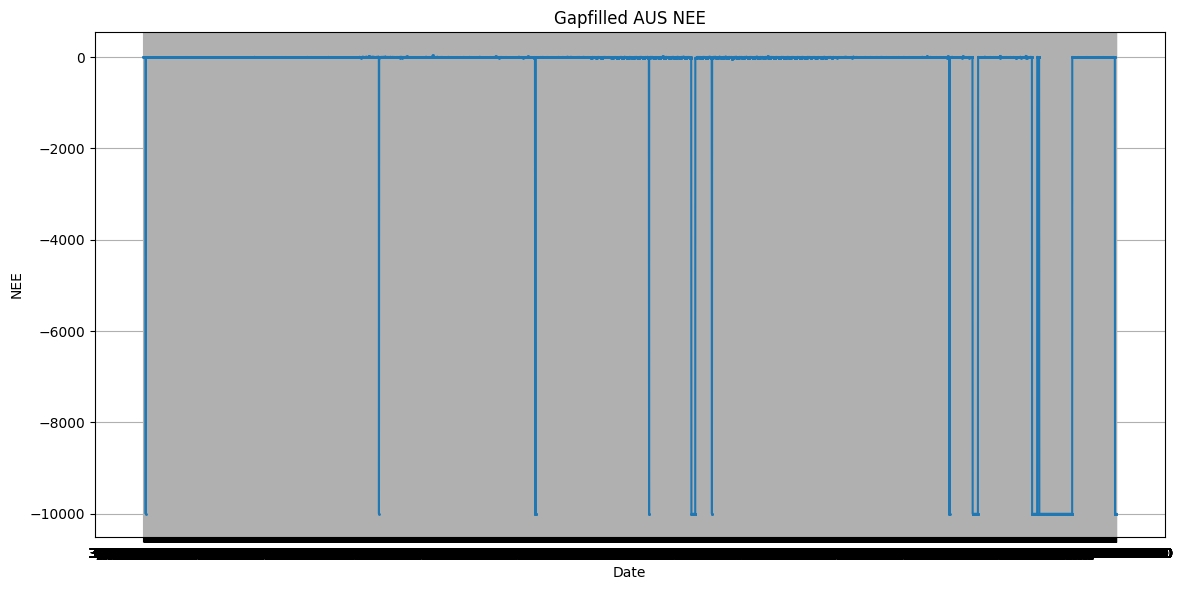

In [104]:
plot_variable(rangeland_data, 'DateTime', 'TA_1_2_1', title="Rangeland Air Temperature")
plot_variable(cropland_data, 'TIMESTAMP', 'Rain', title="Cropland Rainfall")
plot_variable(gapfill_kap_clean, 'Date Time', 'NEE', title="Gapfilled KAP NEE")
plot_variable(gapfill_aus_clean, 'Date Time', 'NEE', title="Gapfilled AUS NEE")

